In [ ]:
# linear regresstion parameter estimation using MCMC

import random
import numpy as np

# generate data point
xs = np.random.random(size=3) * 10
ys = 3 * xs + 10
noise = np.random.normal(size=3, loc=0, scale=2)
noised_ys = ys + noise

# calculate log likelihood
def cal_log_likelihood(w, b, xs, ys):
    # log-likelihood is correlated with variance, so here we use variance to approximate log-likelihood
    ys_hat = w * xs + b
    error = - sum((ys_hat - ys)**2/(2 * 2 ** 2)) # assume we know the sd of noise
    return error
# calculate log prior
def cal_log_prior(w, b, w_mean, w_sd, b_mean, b_sd):
    # use -(theta - mu)^2/(2sigma^2)
    log_p_w = - (w - w_mean)**2/(2 * w_sd**2)
    log_p_b = - (b - b_mean)**2/(2 * b_sd**2)
    return log_p_w + log_p_b


# MCMC
sample_times = 10000
sample_cnt = 0
step_size = 0.15
accept_cnt = 0
w_mean_prior = 0
b_mean_prior = 0
w_sd_prior = 0.1
b_sd_prior = 0.1


old_w = random.gauss(w_mean_prior, w_sd_prior) # prior
old_b = random.gauss(b_mean_prior, b_sd_prior)

sample_ws = [] # record samples
sample_bs = []

# simulation
for i in range(sample_times):
    # generate proposal
    new_w = old_w + random.gauss(0, step_size)
    new_b = old_b + random.gauss(0, step_size)
    
    # check proposal
    log_lh_old = cal_log_likelihood(old_w, old_b, xs, noised_ys)
    log_lh_new = cal_log_likelihood(new_w, new_b, xs, noised_ys)
    log_prior_old = cal_log_prior(old_w, old_b, w_mean_prior, w_sd_prior, b_mean_prior, b_sd_prior)
    log_prior_new = cal_log_prior(new_w, new_b, w_mean_prior, w_sd_prior, b_mean_prior, b_sd_prior)
    log_r = (log_lh_new - log_lh_old) + (log_prior_new - log_prior_old)
    
    # transfer r to alpha, min(1, r)
    if log_r >= 0 or random.random() <= np.exp(log_r):
        old_w = new_w
        old_b = new_b
        accept_cnt += 1
    
    sample_cnt += 1
    sample_ws.append(old_w)
    sample_bs.append(old_b)
    
# acceptance rate
print(accept_cnt/sample_cnt)
# avg w, b
print(np.mean(np.array(sample_ws)))
print(np.mean(np.array(sample_bs)))

0.7755
3.67315407212669
2.0415683550533665


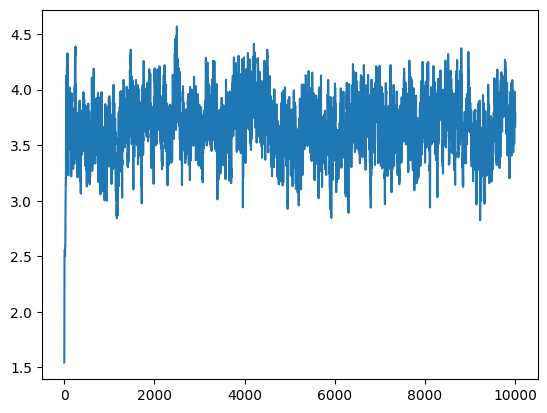

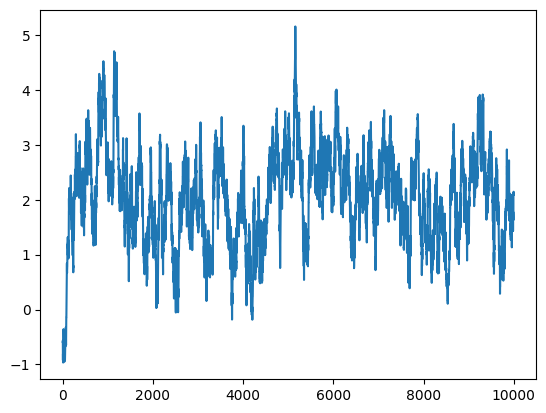

In [25]:
# plot
import matplotlib.pyplot as plt
indices = list(range(sample_times))

plt.plot(indices, sample_ws)
plt.show()

plt.plot(indices, sample_bs)
plt.show()

In [26]:
# remove burn-in periord
burn_in = 1000
print(np.mean(np.array(sample_ws[burn_in:])))
print(np.mean(np.array(sample_bs[burn_in:])))

3.683779569876917
2.02261629041024


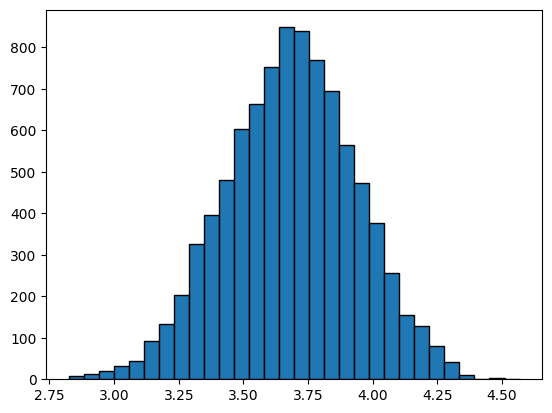

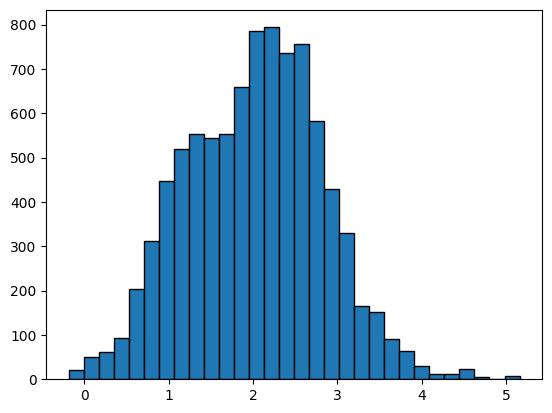

In [27]:
# check distribution
plt.hist(sample_ws[burn_in:], bins=30, edgecolor='black')
plt.show()

plt.hist(sample_bs[burn_in:], bins=30, edgecolor='black')
plt.show()